# ITS307 Data Analytics                                                   : Spring Semester 2022
# Practical 6
# Regularization
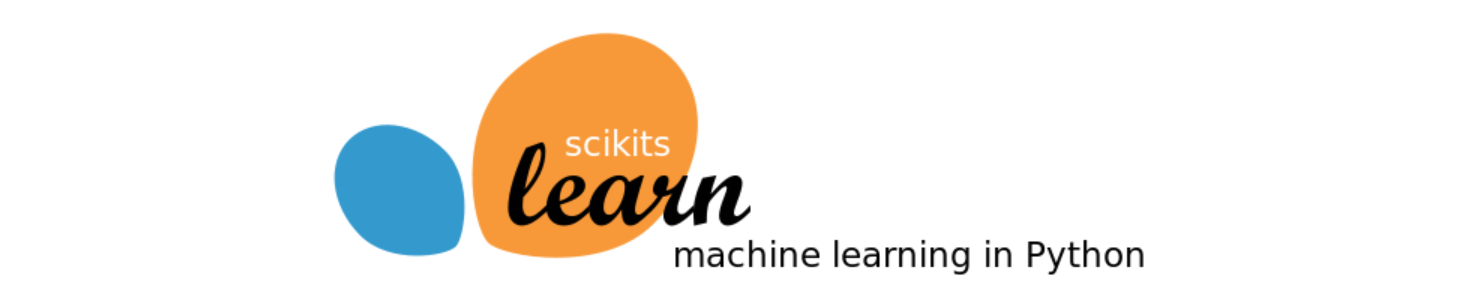

# 1. Import Libraries

In [3]:
import pandas as pd
import matplotlib as plt 
import numpy as np
from sklearn import datasets

ModuleNotFoundError: No module named 'pandas'

In [2]:
boston = datasets.load_boston()
print(boston.DESCR)

NameError: name 'datasets' is not defined

# 2. Load Data

In [3]:
df = pd.DataFrame(data=boston.data,columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
X = boston.data
y = boston.target

# 3. Train test split

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 10)

In [6]:
X_train.shape

(404, 13)

In [7]:
y_train.shape

(404,)

# 4. Simple Linear Model

In [8]:
from sklearn.linear_model import LinearRegression
modellr = LinearRegression()
modellr.fit(X_train, y_train)

LinearRegression()

In [9]:
modellr.predict(X_test)

array([31.0789639 , 31.721694  , 30.87314928, 22.28234976, 18.85606115,
       16.47132499, 36.05004157, 14.64032337, 25.24078574, 36.92073901,
       21.24395893, 31.05887245, 27.83837442, 33.90940352, 33.94484713,
       40.02040311, 24.14373978, 23.32713796, 25.34120561, 21.49039367,
       32.84083784, 17.72022746, 25.36791791, 24.95097385, 32.39265827,
       20.42497001, 19.33257493, 16.97042135, 38.61885431,  0.99817403,
       32.18145419, 32.02985417, 26.01208772, 23.68917386, 20.38030786,
       19.45806916,  3.46147073, 34.9034939 , 26.98281534, 27.54218642,
       33.89021463, 29.7542196 , 18.15540973, 31.44609872, 17.82446519,
       28.30204573, 19.31527567, 21.90113613, 37.88043957, 16.3464837 ,
       24.68739442, 19.29872222, 24.46627252, 33.91063878, 26.63876989,
       34.33425076, 20.88039511, 19.69421544, 18.70556587, 24.73298651,
       19.89555718, 23.36114411, 39.77392395, 42.09981475, 30.12796703,
       16.7250859 , 23.89207337,  3.48737625, 31.5042913 , 28.36

In [10]:
modellr.score(X_train, y_train)

0.750121534530608

In [11]:
modellr.score(X_test, y_test)

0.6709339839115638

# 5. Ridge Regularization for Linear Model

In [12]:
from sklearn.linear_model import Ridge, Lasso
modelr = Ridge(alpha = 0)
modelr.fit(X_train, y_train)
modelr.score(X_train, y_train)

0.750121534530608

In [13]:
modelr.score(X_test, y_test)

0.6709339839115629

# 6. Lasso Regularization for Linear Model

In [14]:
modell = Lasso(alpha = 0)
modell.fit(X_train, y_train)
modell.score(X_train, y_train)

C:\Users\Gyeltshen\AppData\Local\Temp\ipykernel_8380\2775148401.py:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  modell.fit(X_train, y_train)
C:\Users\Gyeltshen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Gyeltshen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.885e+03, tolerance: 3.109e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.R

0.750121534530608

In [15]:
modell.score(X_test, y_test)

0.6709339839115636

# 7. Polynomial Regression of degree 2

In [16]:
from sklearn.preprocessing import PolynomialFeatures
modelpf = PolynomialFeatures(degree = 2)
X_train_poly = modelpf.fit_transform(X_train)
X_train_poly

array([[1.00000000e+00, 8.87300000e-02, 2.10000000e+01, ...,
        1.56467714e+05, 5.32028200e+03, 1.80902500e+02],
       [1.00000000e+00, 1.35222000e+01, 0.00000000e+00, ...,
        1.72712164e+04, 1.75182860e+03, 1.77688900e+02],
       [1.00000000e+00, 1.61282000e+00, 0.00000000e+00, ...,
        6.16578561e+04, 5.05062540e+03, 4.13715600e+02],
       ...,
       [1.00000000e+00, 2.37857000e+00, 0.00000000e+00, ...,
        1.37440733e+05, 4.94553820e+03, 1.77955600e+02],
       [1.00000000e+00, 1.69020000e-01, 0.00000000e+00, ...,
        1.48240400e+05, 5.70214620e+03, 2.19336100e+02],
       [1.00000000e+00, 7.61620000e-01, 2.00000000e+01, ...,
        1.53977760e+05, 4.10058000e+03, 1.09202500e+02]])

In [17]:
X_test_poly = modelpf.fit_transform(X_test)
X_test_poly

array([[1.00000000e+00, 5.47900000e-02, 3.30000000e+01, ...,
        1.54732090e+05, 3.51270480e+03, 7.97449000e+01],
       [1.00000000e+00, 2.18700000e-02, 6.00000000e+01, ...,
        1.54739957e+05, 1.97865110e+03, 2.53009000e+01],
       [1.00000000e+00, 3.58400000e-02, 8.00000000e+01, ...,
        1.57529610e+05, 1.85352300e+03, 2.18089000e+01],
       ...,
       [1.00000000e+00, 1.28020000e-01, 0.00000000e+00, ...,
        1.56214658e+05, 4.84959480e+03, 1.50552900e+02],
       [1.00000000e+00, 1.02900000e-01, 3.00000000e+01, ...,
        1.38942562e+05, 4.18225500e+03, 1.25888400e+02],
       [1.00000000e+00, 2.28760000e-01, 0.00000000e+00, ...,
        5.01264000e+03, 7.52604000e+02, 1.12996900e+02]])

In [18]:
modellrpf = LinearRegression()
modellrpf.fit(X_train_poly, y_train)
modellrpf.score(X_train_poly, y_train)

0.9319230461477529

In [19]:
modellrpf.score(X_test_poly, y_test)

0.8749973786084906

# 8. Ridge Regularization for Polynomial model

In [20]:
from sklearn.linear_model import Ridge, Lasso
modelrpf = Ridge(alpha = 0)
modelrpf.fit(X_train_poly, y_train)
modelrpf.score(X_train_poly, y_train)

0.9317590954736201

In [21]:
modelrpf.score(X_test_poly, y_test)

0.8751024752655924

# 9. Lasso Regularization for Polynomial model

In [22]:
modellpf = Lasso(alpha = 0)
modellpf.fit(X_train_poly, y_train)
modellpf.score(X_train_poly, y_train)

C:\Users\Gyeltshen\AppData\Local\Temp\ipykernel_8380\3364730379.py:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  modellpf.fit(X_train_poly, y_train)
C:\Users\Gyeltshen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Gyeltshen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.318e+03, tolerance: 3.109e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_

0.915214148687129

In [23]:
modellpf.score(X_test_poly, y_test)

0.8563298742252075

# 10. Select K Best

In [24]:
# implementing feature selection using SelectKBest class
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
kb = SelectKBest(score_func = f_regression, k = 7)
X_selected = kb.fit_transform(X,y)
X_selected.shape

(506, 7)

In [25]:
 X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size = 0.2, random_state = 10)
X_train.shape

(404, 7)

In [26]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.6804499602837168

# 11. Conclusion

In [27]:
# To conclude Regularization improves the accuracy of the model and it helps to improve overfitting and unfitting model
# To conclude Select K best improves the accuracy of the model by reducing the number of training data. Which visulizes how our training datas
# are related to each other and it also minizie overfitting and unfitting model